<a href="https://colab.research.google.com/github/zhouziyuanjudy/PHYS417SP25/blob/main/Lab_1_ZiyuanZhou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Report:
## Data Preparation Techniques for Machine Learning

### Name: Ziyuan Zhou

In [41]:
# Import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image # For displaying images in colab jupyter cell

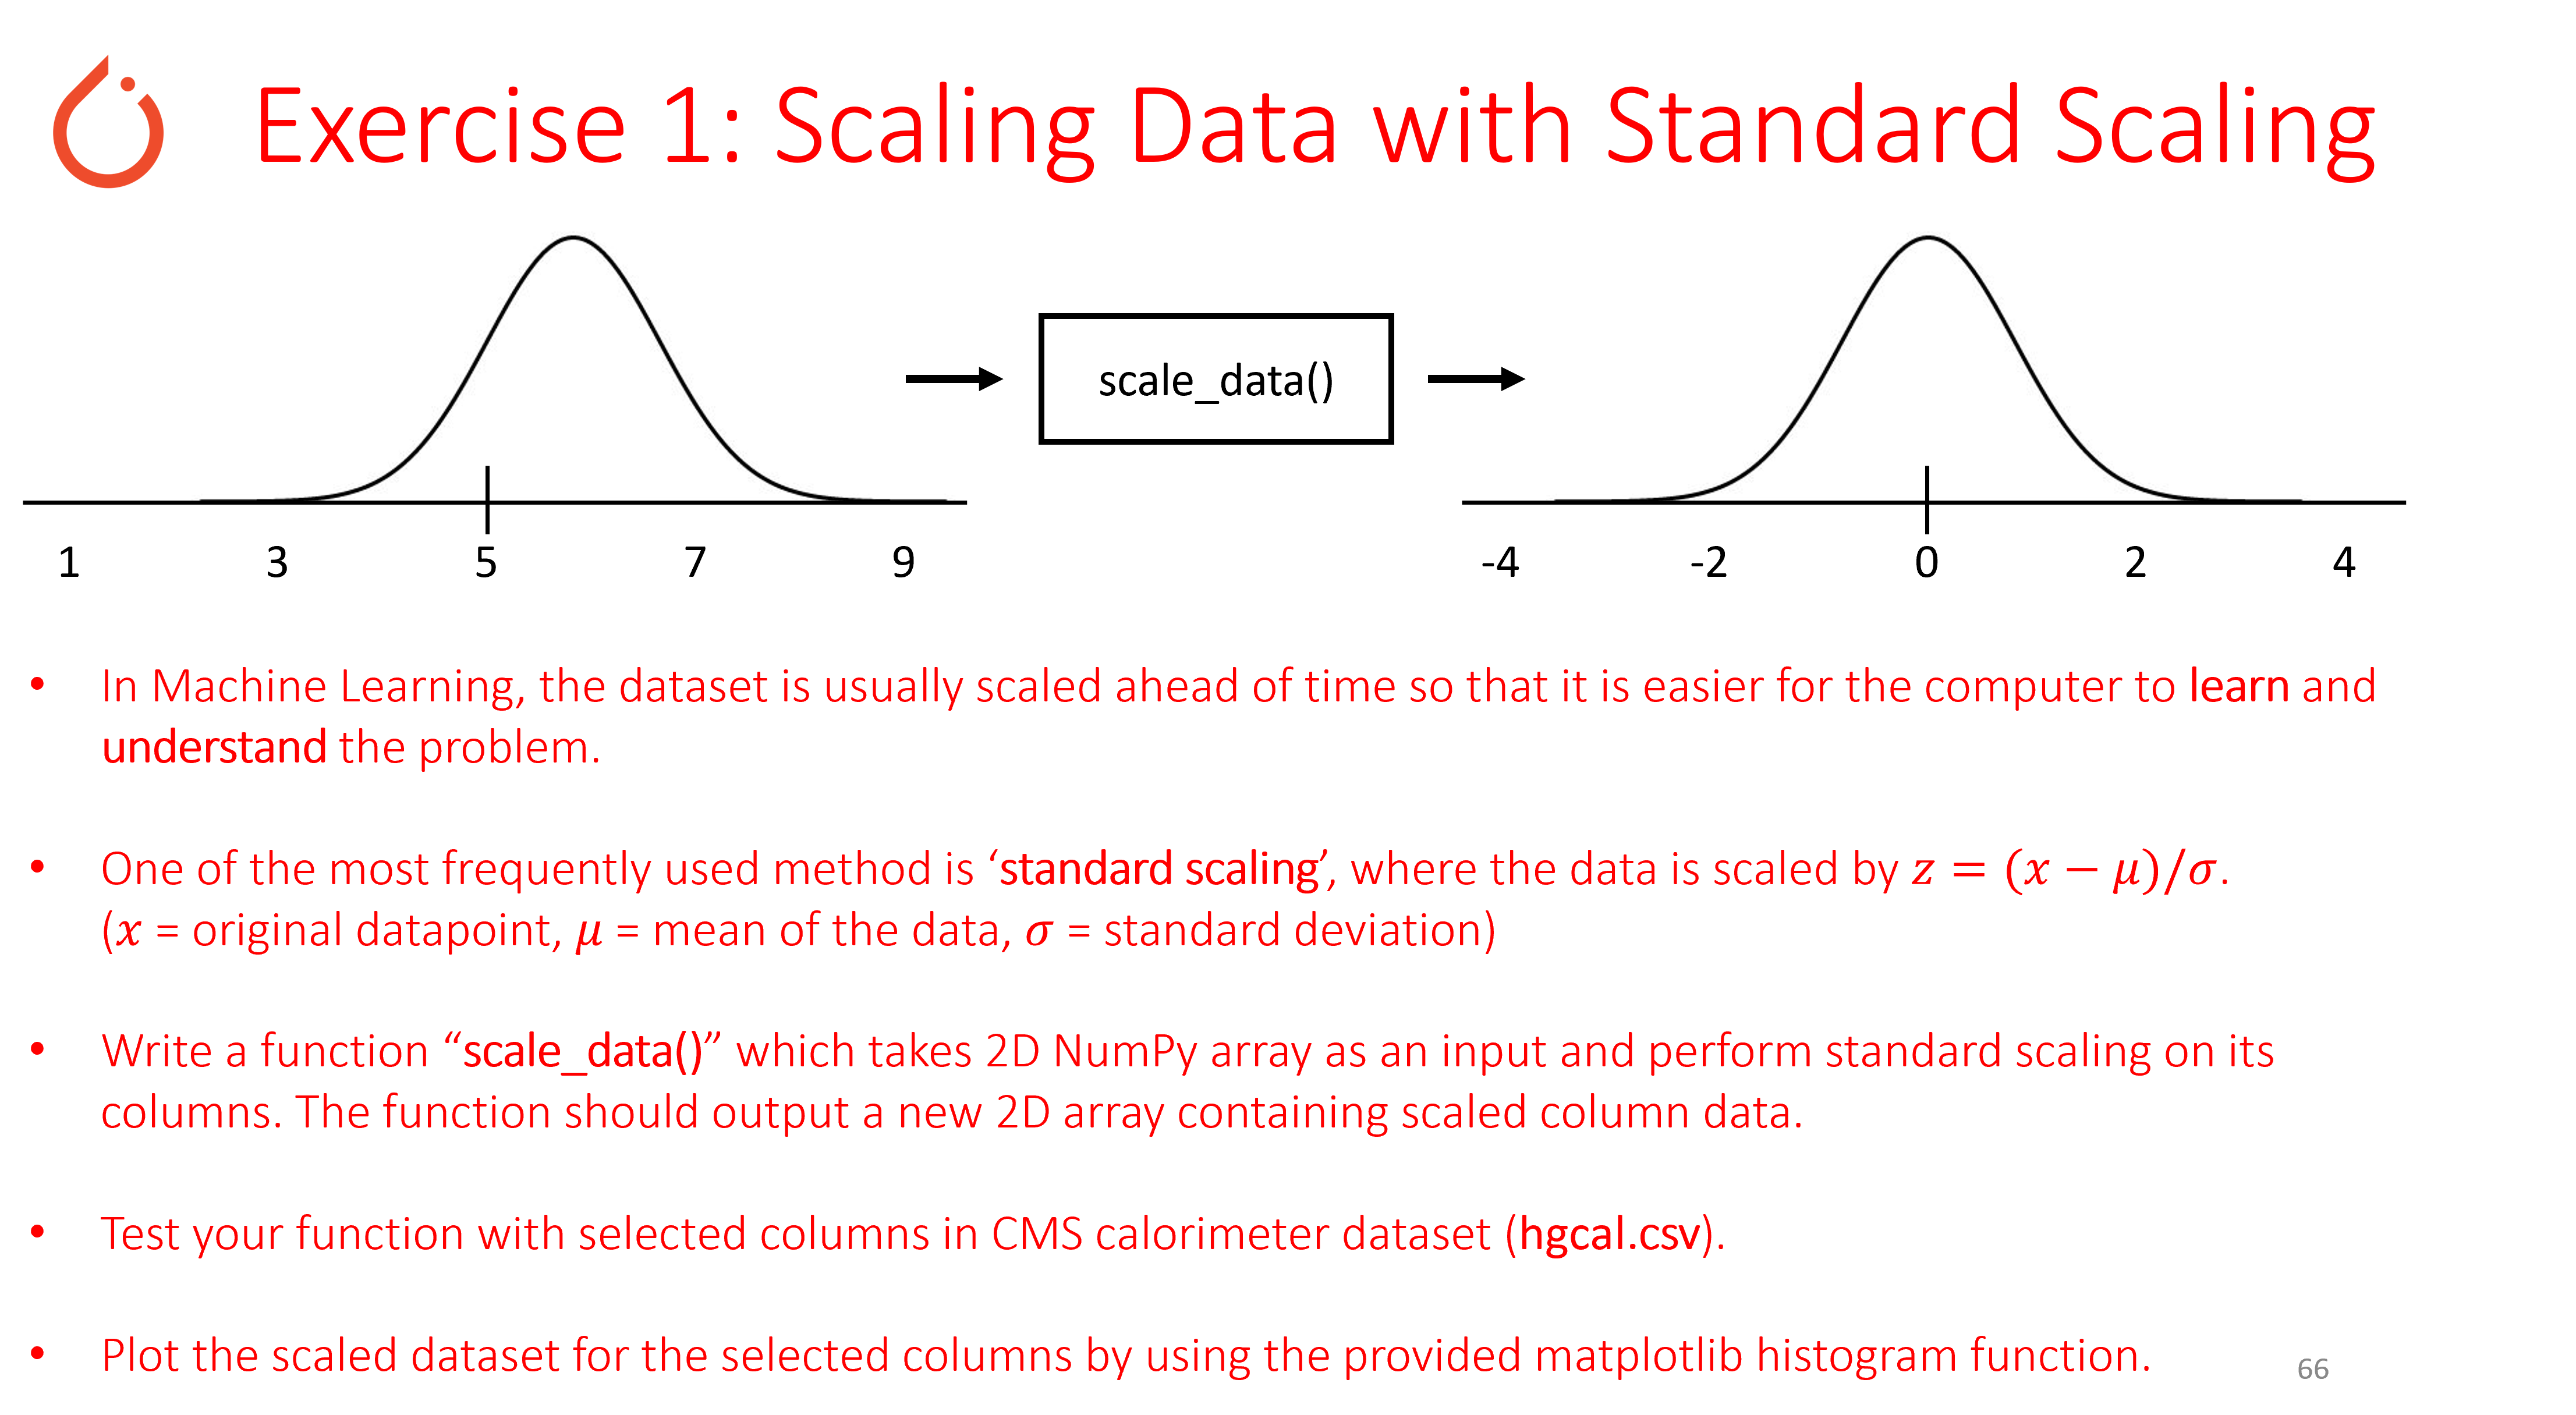

In [ ]:
Image('lab1_exercise1.PNG', width = 1000)

In [42]:
# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows
# This line is used to show first 10 rows
CMS_calori_dataset.head(n = 10)

,Unnamed: 0,x,y,z,eta,phi,energy,trackId
0,0,179.50383,-23.632137,-7.878280,-0.0435,-0.130900,0.200126,462412
1,1,-143.63881,110.217940,-72.706795,-0.3915,2.487094,2.734594,493395
2,2,179.50383,-23.632120,-146.429610,-0.7395,-0.130900,0.423910,1
3,3,-172.67310,54.443620,-238.065340,-1.0875,2.836160,0.713950,493640
4,4,-180.88046,7.897389,-238.065340,-1.0875,3.097959,0.000000,495225
5,5,-180.88045,-7.897438,-238.065340,-1.0875,-3.097959,0.034491,495225
6,6,-152.69838,-97.279590,-265.020540,-1.1745,-2.574361,0.580138,460126
7,7,-23.63213,179.503810,-325.172060,-1.3485,1.701696,0.411487,465028
8,8,-152.69835,97.279594,89.977780,0.4785,2.574361,0.183141,1383
9,9,-176.76110,39.187016,107.930240,0.5655,2.923426,0.337551,4421


In [43]:
# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

print(CMS_calori_dataset_np.shape)

(420, 8)


In [44]:
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub.
# The array should have dimension 420 (rows) x 6 (columns)
# Extract selected columns from dataset and convert to NumPy array
CMS_calori_dataset_np_sub = CMS_calori_dataset[['x', 'y', 'z', 'eta', 'phi', 'energy']].to_numpy()
# Print the shape of the result array, so it can make sure my sub arrays is correct dimension
print("Shape:", CMS_calori_dataset_np_sub.shape)

Shape: (420, 6)


In [45]:
# Create the scaling function

def scale_data(arr):

    # Compute mean and standard deviation for each column
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)

    # standard scaling formula: z = (x - mean) / std
    scaled_data = (arr - mean) / std

    return scaled_data

In [46]:
# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

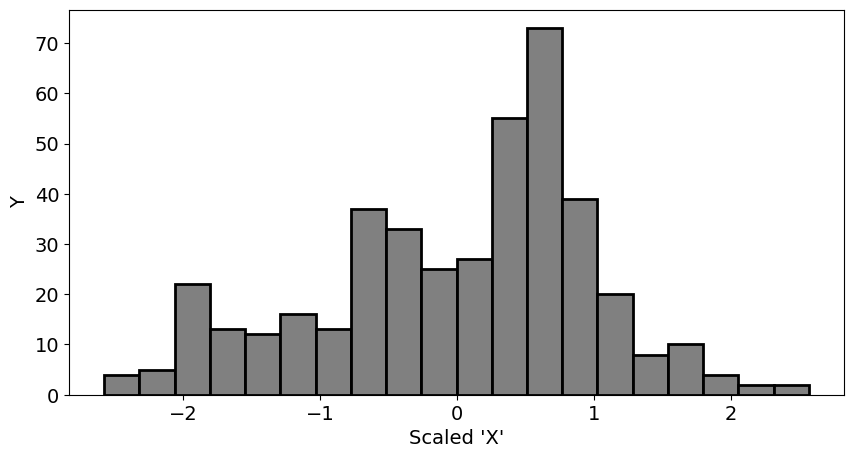

In [47]:
# Confirm the data is scaled for 'x' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label
plt.xlabel("Scaled 'X'", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.show()

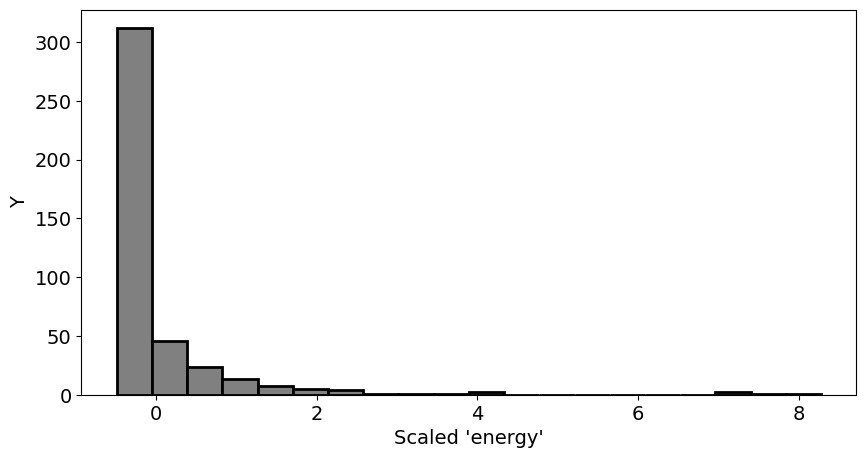

In [48]:
# Confirm the data is scaled for 'energy' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label

# YOUR CODE HERE
# Add proper x-label and y-label
plt.xlabel("Scaled 'energy'", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.show()

### Expected histogram outputs - Feel free to style your plot differently

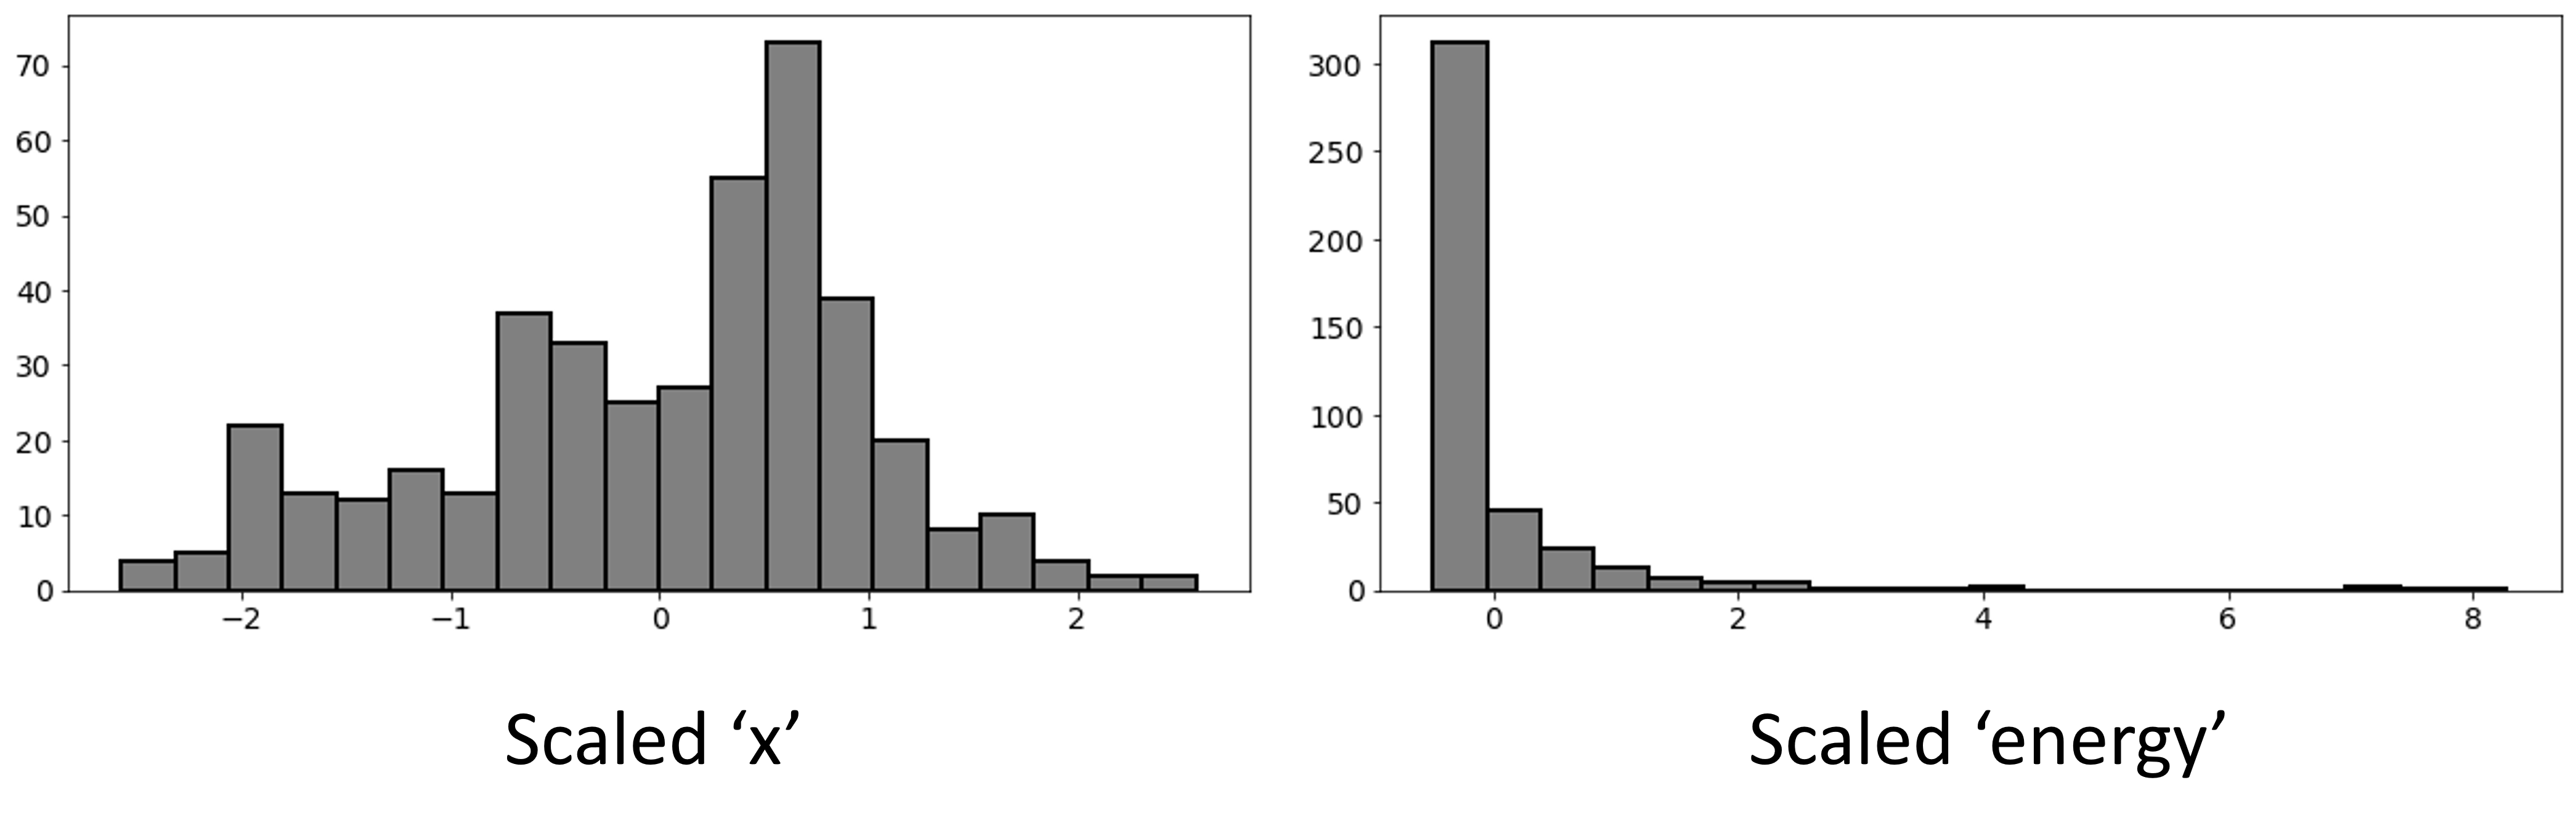

In [ ]:
Image('lab1_e1_expected_outputs.PNG', width = 1000)

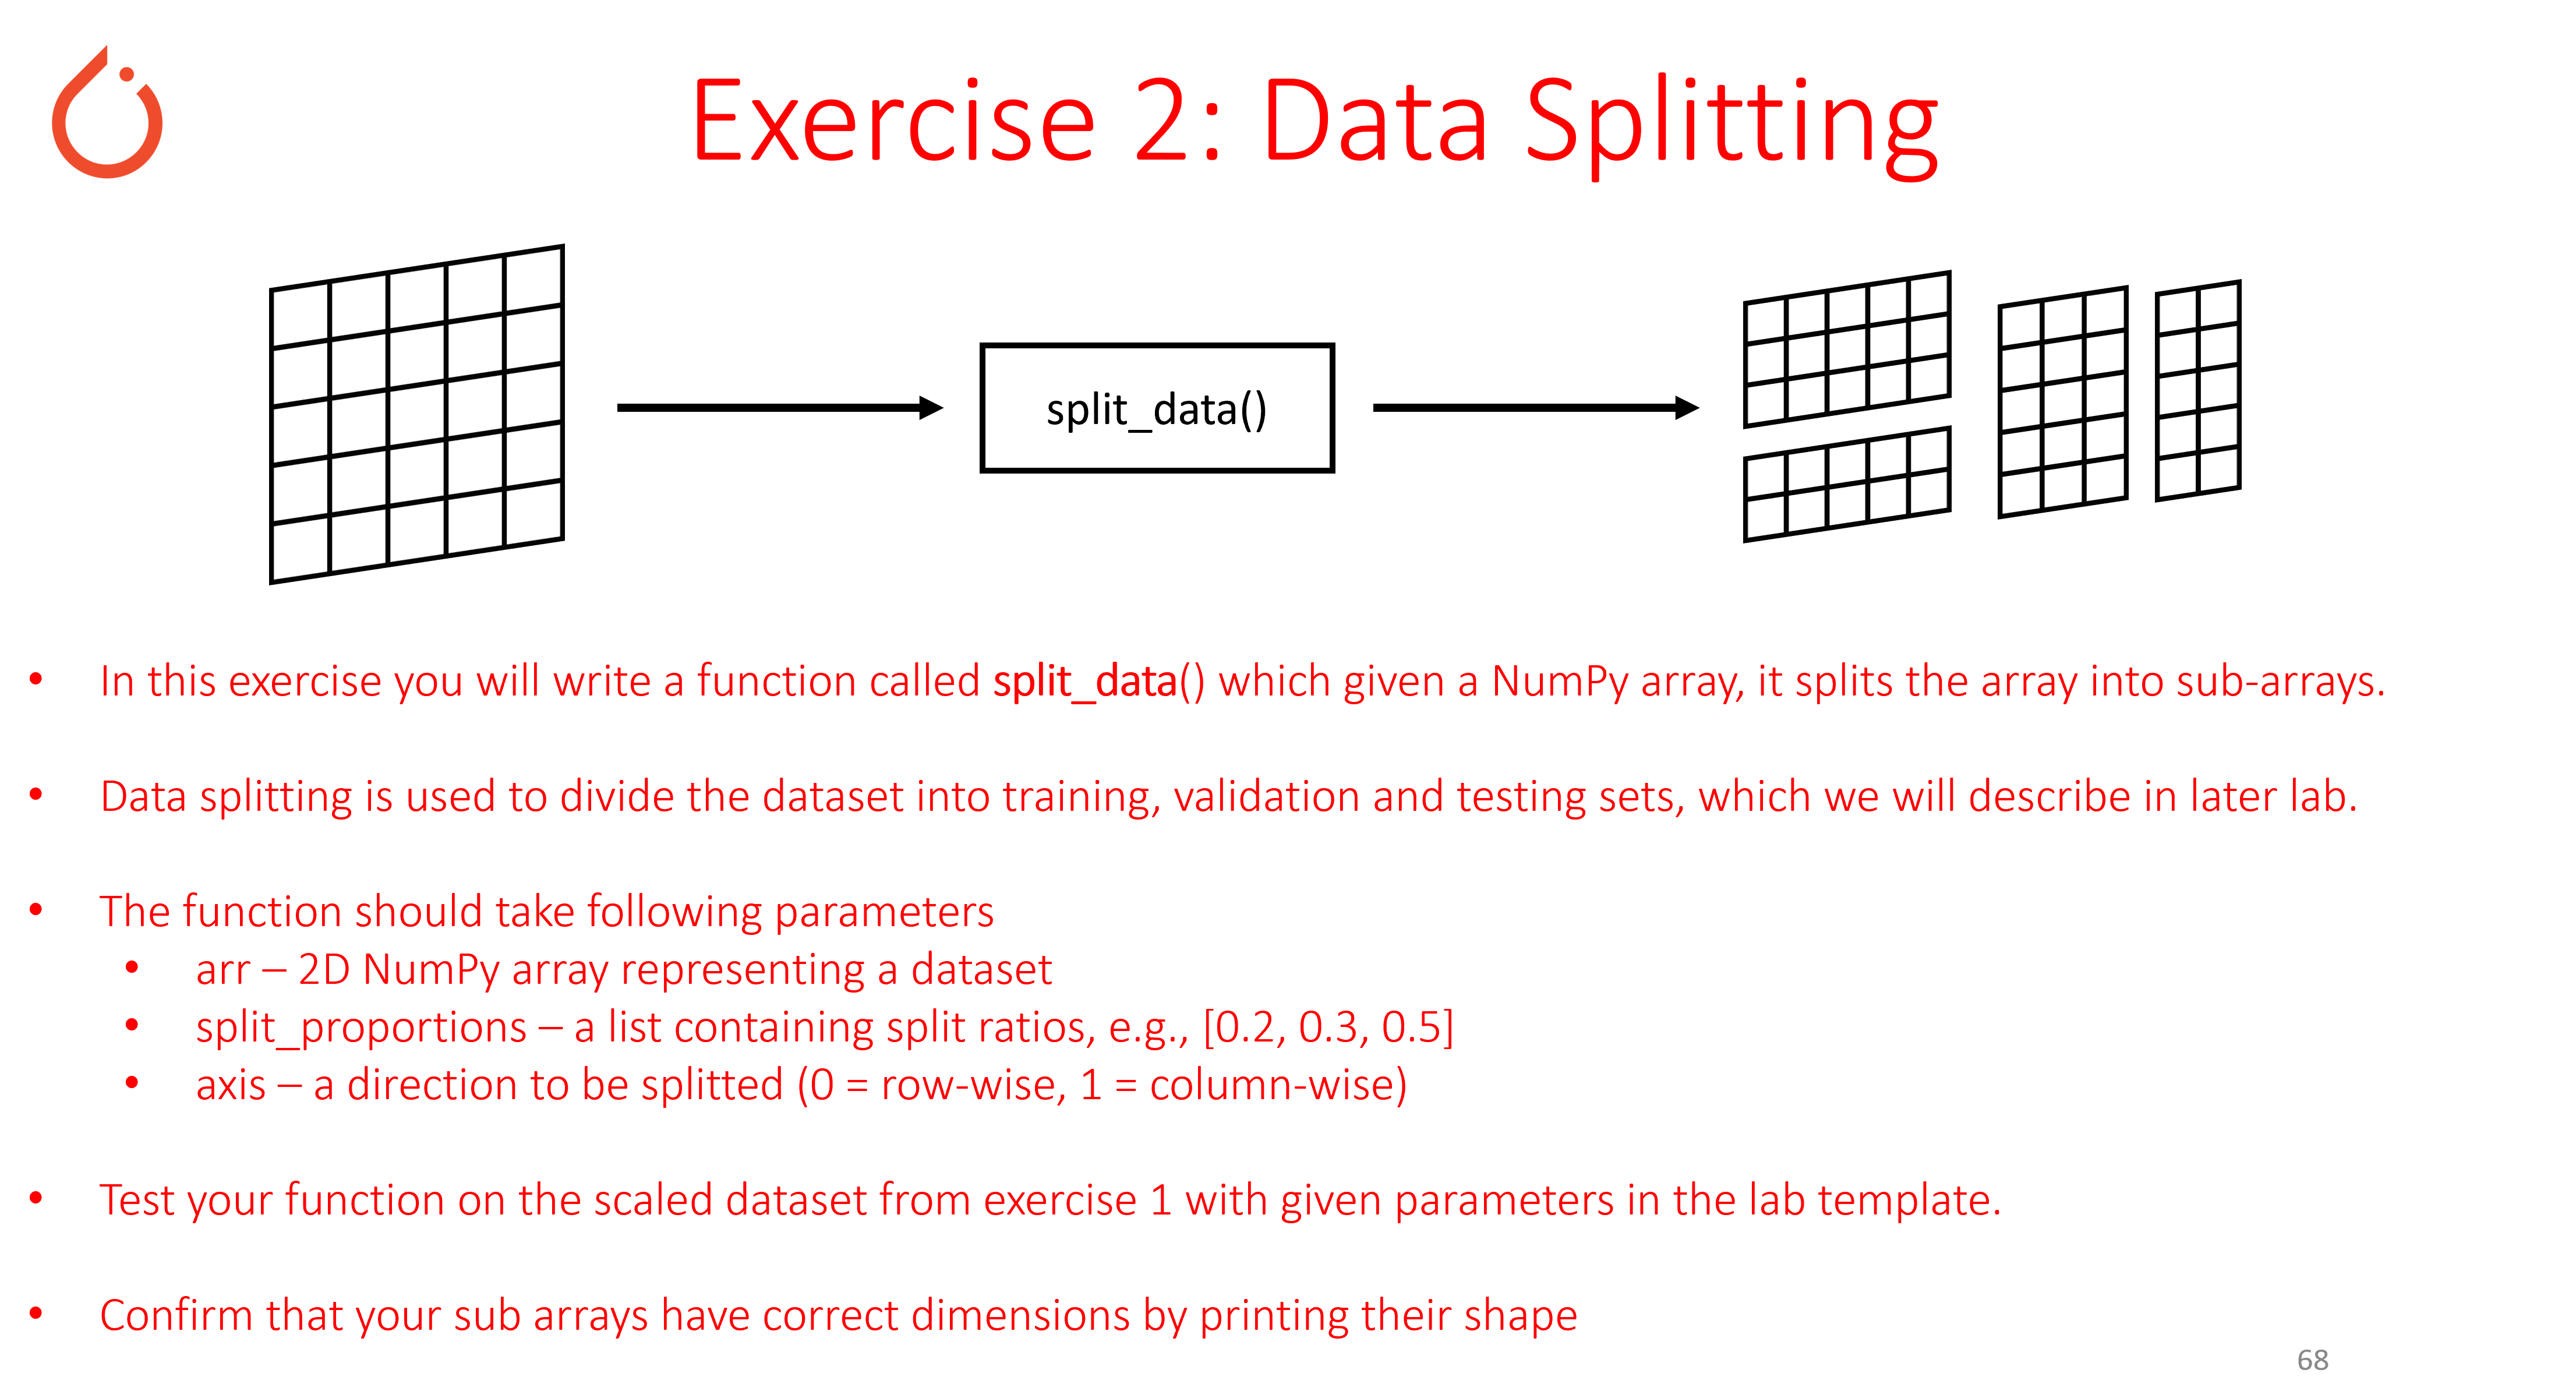

In [53]:
image_path = "lab1_exercise2.png"
Image(filename=image_path, width=1000)

In [54]:
# Create the splitting function
def split_data(arr, split_proportions, axis):

    # YOUR CODE HERE
     # Calculate total size along the given axis(By chatgpt)
    total = arr.shape[axis]

    # Convert proportions to actual split sizes
    sizes = [int(p * total) for p in split_proportions]

    # split the array
    array_split = np.cumsum(sizes)[:-1]
    split_data_list = np.split(arr, array_split, axis=axis)

    # Returns a list of numpy sub-arrays according to split proportions
    return split_data_list

In [55]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled,
                                    split_proportions = [0.6, 0.2, 0.2], axis = 0)

In [56]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)

print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 6) (84, 6) (84, 6)


In [57]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled,
                                                split_proportions = [0.5, 0.5], axis = 1)

In [58]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 3)
